## ELEC5307-2021-S2: Project 1 report

### Name (SID): Zhanhui Chen (500131284)

Please follow the instructions carefully:
- This project is based on Cifar-10 dataset. The basic loading operations are added already. Please do not use other dataset.
- Remove the corresponding `e.g.` and fill in all the blanks in this file, including some codes in Part 1, your choices for Part 2, your task for Part 3, and the analyses for your choices, specification of your computer, etc.
- Please do not change the format of this report.
- In your analyses, you can add math functions and graphs.
- Please make clear comments and references for any codes written by yourself or copied from other sources.

### Part 0: Prepare for Colab

The default colab uses CPU, you can add GPU resources in Runtime->Change runtime type->dropdown, select GPU->save

**Note: the following code is written for cpu, you need to allocate data and network to GPU on your own if you want to utilize GPU devices.**

### Part 1: Baseline model
You need to run this model successfully to get the marks. You should finish the codes that are used to split the training dataset into training set (45000 images) and validation set (5000 images) and draw the loss curve for training loss and validation loss. 

### 1.1 prepare data

In [1]:
# useful packages
import torch
import torchvision
import torchvision.transforms as transforms
from torch import nn

In [2]:
transform = transforms.ToTensor()

trainset = torchvision.datasets.CIFAR10(root='/tmp/CIFAR10', train=True,
                                        download=True, transform=transform)
trainset = [item for item in trainset]
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='/tmp/CIFAR10', train=False,
                                       download=True, transform=transform)
testset = [item for item in testset]
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting /tmp/CIFAR10/cifar-10-python.tar.gz to /tmp/CIFAR10
Files already downloaded and verified


### 1.2 split the training data into training and validation
In most of the cases, you are given the test set, so you need to prepare some validation data to evaluate your model during training stage. You need to make a validation dataset that contains 5000 training images, and the rest 45000 images are used as the new training set.

In [3]:
# randomly split the dataset, 45000 for train set and 5000 for validation.
NEWtrainset, validationset = torch.utils.data.random_split(trainset, [45000, 5000]) 
NEWtrainloader = torch.utils.data.DataLoader(NEWtrainset, batch_size=4,
                                          shuffle=True, num_workers=2)
validationloader = torch.utils.data.DataLoader(validationset, batch_size=4,
                                          shuffle=True, num_workers=2)

### 1.3 Define a Baseline Convolution Neural Network

In [4]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.relu1 = nn.ReLU()
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.relu2 = nn.ReLU()
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.relu3 = nn.ReLU()
        self.fc2 = nn.Linear(120, 84)
        self.relu4 = nn.ReLU()
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(self.relu1(self.conv1(x)))
        x = self.pool(self.relu2(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = self.relu3(self.fc1(x))
        x = self.relu4(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

### 1.4 Define a Loss function and optimizer

In [5]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

### 1.5 Train the network

In [19]:
trainloss = [] 
valloss = []
# lists that are used to plot the loss and accuracy cruves

def nntrain(trainloss, valloss, learning_rate, Epoches):
    optimizer = optim.SGD(net.parameters(), lr=learning_rate, momentum=0.9)
    
    for epoch in range(Epoches):  # loop over the dataset multiple times

        running_loss = 0.0
        for i, data in enumerate(NEWtrainloader, 0):
            # get the inputs
            inputs, labels = data
            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            # print statistics
            running_loss += loss.item()
            mini_batches = len(NEWtrainloader)/5    # split the batch into 5 mini-batches
            if i % mini_batches == mini_batches-1:    # print mini-batches
                print('[%d, %5d] training loss: %.3f' %
                      (epoch + 1, i + 1, running_loss / mini_batches))
                trainloss.append(running_loss / mini_batches)
                running_loss = 0.0
        
        val_running_loss = 0.0
        for i, data in enumerate(validationloader, 0):
            # get the inputs
            inputs, labels = data
            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            # print statistics
            val_running_loss += loss.item()
            mini_batches = len(validationloader)/5
            if i % mini_batches == mini_batches-1:
                print('[%d, %5d] validation loss: %.3f' %
                      (epoch + 1, i + 1, val_running_loss / mini_batches))
                valloss.append(val_running_loss / mini_batches)
                val_running_loss = 0.0

learning_rate = 0.001
Epoches = 2
nntrain(trainloss, valloss, learning_rate, Epoches)

print('Finished Training')

[1,  2250] training loss: 2.297
[1,  4500] training loss: 2.086
[1,  6750] training loss: 1.899
[1,  9000] training loss: 1.719
[1, 11250] training loss: 1.632
[1,   250] validation loss: 1.634
[1,   500] validation loss: 1.601
[1,   750] validation loss: 1.583
[1,  1000] validation loss: 1.560
[1,  1250] validation loss: 1.587
[2,  2250] training loss: 1.546
[2,  4500] training loss: 1.525
[2,  6750] training loss: 1.499
[2,  9000] training loss: 1.474
[2, 11250] training loss: 1.442
[2,   250] validation loss: 1.379
[2,   500] validation loss: 1.401
[2,   750] validation loss: 1.404
[2,  1000] validation loss: 1.370
[2,  1250] validation loss: 1.391
Finished Training


### 1.6 visualize the loss and accuracy
Using the loss of both training data and validation data to evaluate the model. You may need to change some of the codes in 1.5 in order to save the loss into different lists.

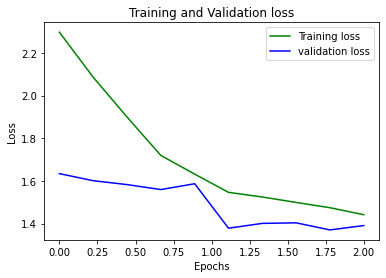

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show the loss
epochs = np.linspace(0, 2, num=10)  # 2 epoches
plt.plot(epochs, trainloss, 'g', label='Training loss')
plt.plot(epochs, valloss, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### 1.7 Eval the trained network

In [21]:
def eval_net(net, testloader):
    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print('Accuracy of the network on the 10000 test images: %d %%' % (
        100 * correct / total))

# check the accuracy of the trained model
eval_net(net, NEWtrainloader)
eval_net(net, validationloader)

Accuracy of the network on the 10000 test images: 50 %
Accuracy of the network on the 10000 test images: 53 %


### Part 2: Hyperparameters Selection
Following the instruction file, you need to make choices for each hyperparameters:

1. Batch size: 8
2. Base learning rate: 0.001
3. Number of epochs: 16

**Question**: Why do you make such choices? Use some figures, math equations, codes and printout to make analysis.

In the following analysis, I have adjusted the training function such that it can train the data set as well as calculate the accuracy. However, unlike part one, here the result of the loss and accuracy will only be calculated at **each epoch**, instead of a mini batch. 

In [6]:
def nntrain(trainloss, valloss, trainacc, valacc, learning_rate, Epoches):
    # redefine the optimizer using the new learning rate if nessesary
    optimizer = optim.SGD(net.parameters(), lr=learning_rate, momentum=0.9)
    
    for epoch in range(Epoches):  # loop over the dataset multiple times
        print()
        print("epoch: ", epoch+1)

        running_loss = 0.0
        for i, data in enumerate(NEWtrainloader, 0):
            # get the inputs
            inputs, labels = data
            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            # print statistics
            running_loss += loss.item()
        
        mini_batches = len(NEWtrainloader)/5
        trainloss.append(running_loss / mini_batches)   # print the loss each epoch
        print('[%d, %5d] training loss: %.3f' %
                (epoch + 1, i + 1, running_loss / mini_batches))
        running_loss = 0.0

        correct = 0
        total = 0
        with torch.no_grad():
            for data in NEWtrainloader:
                images, labels = data
                outputs = net(images)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        # print the accuracy each epoch
        print('Accuracy of the network on the 45000 train set images: %d %%' % (
            100 * correct / total))
        trainacc.append(100 * correct / total)
        
        val_running_loss = 0.0
        for i, data in enumerate(validationloader, 0):
            # get the inputs
            inputs, labels = data
            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            # print statistics
            val_running_loss += loss.item()

        mini_batches = len(validationloader)/5
        print('[%d, %5d] validation loss: %.3f' %
               (epoch + 1, i + 1, val_running_loss / mini_batches))
        valloss.append(val_running_loss / mini_batches)
        val_running_loss = 0.0

        correct = 0
        total = 0
        with torch.no_grad():
            for data in validationloader:
                images, labels = data
                outputs = net(images)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        print('Accuracy of the network on the 5000 validation set images: %d %%' % (
            100 * correct / total))
        valacc.append(100 * correct / total)

    print('Finished Training')

The plotting function will distinguish the loss plot and the accuracy plot. 

In [7]:
import matplotlib.pyplot as plt
import numpy as np

def plotting(set1, set2, Epoches, loss):
    epochs = np.linspace(0, Epoches, num=Epoches)
    if(loss == True):   # determine if the plot is a loss plot
        plt.plot(epochs, set1, 'g', label='Training loss')
        plt.plot(epochs, set2, 'b', label='validation loss')
        plt.title('Training and Validation loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
    else:               # the plot is an accuracy plot
        plt.plot(epochs, set1, 'g', label='Training accuracy')
        plt.plot(epochs, set2, 'b', label='validation accuracy')
        plt.title('Training and Validation accuracy')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

In [8]:
# define the variables that need to analysis
Batch = [2, 4, 8]
Learning_rate = [0.005, 0.001, 0.0005, 0.0001, 0.00005, 0.00001]
Epoches = [1, 2, 4, 8, 16]

When batch size is 2:
1. learning rate at 0.005

In [11]:
batch = 2
lr = 0.005

In [32]:
NEWtrainloader = torch.utils.data.DataLoader(NEWtrainset, batch_size=batch,
                                          shuffle=True, num_workers=2)
validationloader = torch.utils.data.DataLoader(validationset, batch_size=batch,
                                          shuffle=True, num_workers=2)

batch_size:  2  learning_rate:  0.005

epoch:  1
[1, 22500] training loss: 10.177
Accuracy of the network on the 45000 train set images: 25 %
[1,  2500] validation loss: 9.753
Accuracy of the network on the 5000 validation set images: 30 %

epoch:  2
[2, 22500] training loss: 9.826
Accuracy of the network on the 45000 train set images: 23 %
[2,  2500] validation loss: 9.838
Accuracy of the network on the 5000 validation set images: 28 %

epoch:  3
[3, 22500] training loss: 9.876
Accuracy of the network on the 45000 train set images: 27 %
[3,  2500] validation loss: 10.033
Accuracy of the network on the 5000 validation set images: 24 %

epoch:  4
[4, 22500] training loss: 9.936
Accuracy of the network on the 45000 train set images: 25 %
[4,  2500] validation loss: 9.914
Accuracy of the network on the 5000 validation set images: 27 %

epoch:  5
[5, 22500] training loss: 9.891
Accuracy of the network on the 45000 train set images: 27 %
[5,  2500] validation loss: 9.997
Accuracy of the net

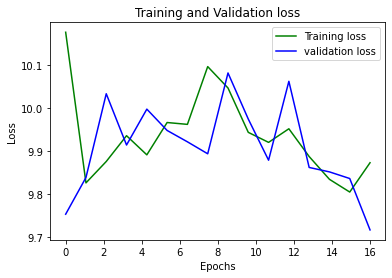

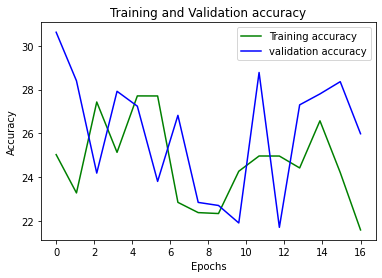

In [34]:
net = Net()
trainloss = []
valloss = []
trainacc = []
valacc = []

print("batch_size: ", batch, " learning_rate: ", lr)
nntrain(trainloss, valloss, trainacc, valacc, lr, 16)
plotting(trainloss, valloss, 16, True)
plotting(trainacc, valacc, 16, False)

Both the loss and accuracy plot shows a big fluctuation and no conclusion can be drawn. 

  2. learning rate is 0.001

batch_size:  2  learning_rate:  0.001

epoch:  1
[1, 22500] training loss: 9.194
Accuracy of the network on the 45000 train set images: 41 %
[1,  2500] validation loss: 7.685
Accuracy of the network on the 5000 validation set images: 49 %

epoch:  2
[2, 22500] training loss: 7.273
Accuracy of the network on the 45000 train set images: 52 %
[2,  2500] validation loss: 6.793
Accuracy of the network on the 5000 validation set images: 58 %

epoch:  3
[3, 22500] training loss: 6.704
Accuracy of the network on the 45000 train set images: 53 %
[3,  2500] validation loss: 6.271
Accuracy of the network on the 5000 validation set images: 64 %

epoch:  4
[4, 22500] training loss: 6.310
Accuracy of the network on the 45000 train set images: 59 %
[4,  2500] validation loss: 5.902
Accuracy of the network on the 5000 validation set images: 66 %

epoch:  5
[5, 22500] training loss: 6.029
Accuracy of the network on the 45000 train set images: 62 %
[5,  2500] validation loss: 5.746
Accuracy of the netwo

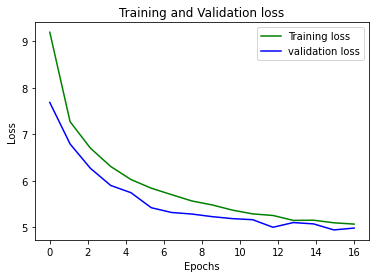

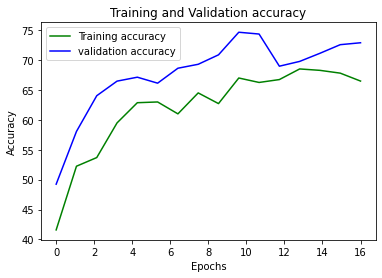

In [35]:
lr = 0.001
net = Net()
trainloss = []
valloss = []
trainacc = []
valacc = []

print("batch_size: ", batch, " learning_rate: ", lr)
nntrain(trainloss, valloss, trainacc, valacc, lr, 16)
plotting(trainloss, valloss, 16, True)
plotting(trainacc, valacc, 16, False)

The margin between the validation and training dataset accuracy is too large to be considered a good choice

  3. learning rate is 0.0005

batch_size:  2  learning_rate:  0.0005

epoch:  1
[1, 11250] training loss: 10.701
Accuracy of the network on the 45000 train set images: 31 %
[1,  1250] validation loss: 9.258
Accuracy of the network on the 5000 validation set images: 36 %

epoch:  2
[2, 11250] training loss: 8.200
Accuracy of the network on the 45000 train set images: 46 %
[2,  1250] validation loss: 7.490
Accuracy of the network on the 5000 validation set images: 47 %

epoch:  3
[3, 11250] training loss: 7.186
Accuracy of the network on the 45000 train set images: 52 %
[3,  1250] validation loss: 6.803
Accuracy of the network on the 5000 validation set images: 54 %

epoch:  4
[4, 11250] training loss: 6.645
Accuracy of the network on the 45000 train set images: 53 %
[4,  1250] validation loss: 6.321
Accuracy of the network on the 5000 validation set images: 57 %

epoch:  5
[5, 11250] training loss: 6.245
Accuracy of the network on the 45000 train set images: 56 %
[5,  1250] validation loss: 6.018
Accuracy of the net

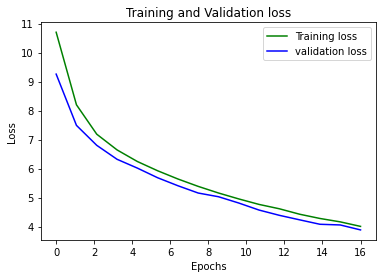

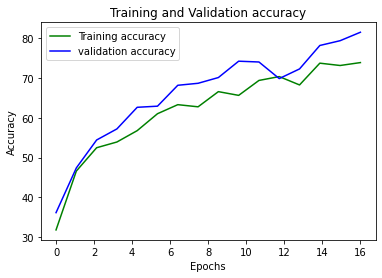

In [12]:
lr = 0.0005
net = Net()
trainloss = []
valloss = []
trainacc = []
valacc = []

print("batch_size: ", batch, " learning_rate: ", lr)
nntrain(trainloss, valloss, trainacc, valacc, lr, 16)
plotting(trainloss, valloss, 16, True)
plotting(trainacc, valacc, 16, False)

The margin between the validation and training dataset accuracy is too large to be considered a good choice

4. learning rate is 0.0001

batch_size:  2  learning_rate:  0.0001

epoch:  1
[1, 11250] training loss: 11.513
Accuracy of the network on the 45000 train set images: 15 %
[1,  1250] validation loss: 11.493
Accuracy of the network on the 5000 validation set images: 16 %

epoch:  2
[2, 11250] training loss: 11.036
Accuracy of the network on the 45000 train set images: 19 %
[2,  1250] validation loss: 10.188
Accuracy of the network on the 5000 validation set images: 26 %

epoch:  3
[3, 11250] training loss: 9.876
Accuracy of the network on the 45000 train set images: 30 %
[3,  1250] validation loss: 9.507
Accuracy of the network on the 5000 validation set images: 32 %

epoch:  4
[4, 11250] training loss: 9.173
Accuracy of the network on the 45000 train set images: 37 %
[4,  1250] validation loss: 8.690
Accuracy of the network on the 5000 validation set images: 39 %

epoch:  5
[5, 11250] training loss: 8.405
Accuracy of the network on the 45000 train set images: 42 %
[5,  1250] validation loss: 7.972
Accuracy of the 

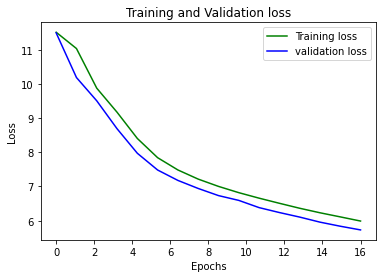

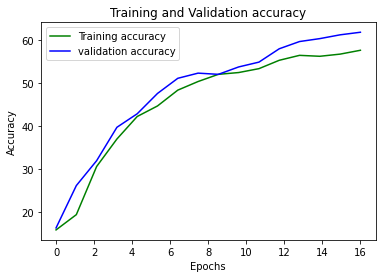

In [13]:
lr = 0.0001
net = Net()
trainloss = []
valloss = []
trainacc = []
valacc = []

print("batch_size: ", batch, " learning_rate: ", lr)
nntrain(trainloss, valloss, trainacc, valacc, lr, 16)
plotting(trainloss, valloss, 16, True)
plotting(trainacc, valacc, 16, False)

The starting accuracy is too small due to a small learning rate, hence a low accuracy overall. 

5. learning rate is 0.00005

batch_size:  2  learning_rate:  5e-05

epoch:  1
[1, 11250] training loss: 11.516
Accuracy of the network on the 45000 train set images: 10 %
[1,  1250] validation loss: 11.515
Accuracy of the network on the 5000 validation set images: 9 %

epoch:  2
[2, 11250] training loss: 11.512
Accuracy of the network on the 45000 train set images: 10 %
[2,  1250] validation loss: 11.512
Accuracy of the network on the 5000 validation set images: 10 %

epoch:  3
[3, 11250] training loss: 11.511
Accuracy of the network on the 45000 train set images: 12 %
[3,  1250] validation loss: 11.510
Accuracy of the network on the 5000 validation set images: 13 %

epoch:  4
[4, 11250] training loss: 11.509
Accuracy of the network on the 45000 train set images: 14 %
[4,  1250] validation loss: 11.508
Accuracy of the network on the 5000 validation set images: 17 %

epoch:  5
[5, 11250] training loss: 11.506
Accuracy of the network on the 45000 train set images: 16 %
[5,  1250] validation loss: 11.504
Accuracy of 

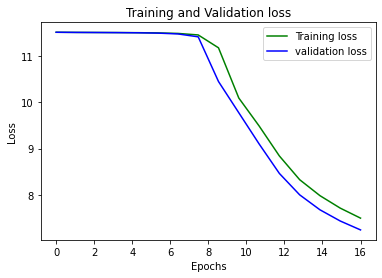

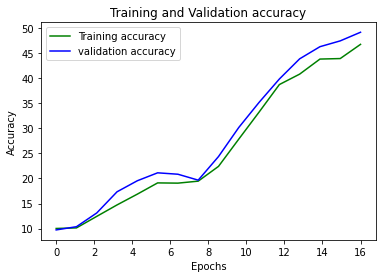

In [14]:
lr = 0.00005
net = Net()
trainloss = []
valloss = []
trainacc = []
valacc = []

print("batch_size: ", batch, " learning_rate: ", lr)
nntrain(trainloss, valloss, trainacc, valacc, lr, 16)
plotting(trainloss, valloss, 16, True)
plotting(trainacc, valacc, 16, False)

The starting accuracy is too small due to a small learning rate, hence a low accuracy overall. 

6. learning rate is 0.00001

batch_size:  2  learning_rate:  1e-05

epoch:  1
[1, 11250] training loss: 11.517
Accuracy of the network on the 45000 train set images: 9 %
[1,  1250] validation loss: 11.514
Accuracy of the network on the 5000 validation set images: 10 %

epoch:  2
[2, 11250] training loss: 11.513
Accuracy of the network on the 45000 train set images: 10 %
[2,  1250] validation loss: 11.511
Accuracy of the network on the 5000 validation set images: 9 %

epoch:  3
[3, 11250] training loss: 11.510
Accuracy of the network on the 45000 train set images: 10 %
[3,  1250] validation loss: 11.508
Accuracy of the network on the 5000 validation set images: 10 %

epoch:  4
[4, 11250] training loss: 11.507
Accuracy of the network on the 45000 train set images: 11 %
[4,  1250] validation loss: 11.505
Accuracy of the network on the 5000 validation set images: 11 %

epoch:  5
[5, 11250] training loss: 11.504
Accuracy of the network on the 45000 train set images: 11 %
[5,  1250] validation loss: 11.502
Accuracy of t

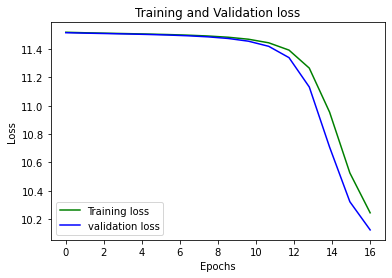

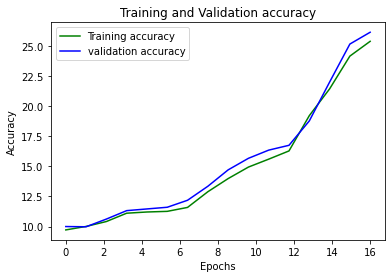

In [15]:
lr = 0.00001
net = Net()
trainloss = []
valloss = []
trainacc = []
valacc = []

print("batch_size: ", batch, " learning_rate: ", lr)
nntrain(trainloss, valloss, trainacc, valacc, lr, 16)
plotting(trainloss, valloss, 16, True)
plotting(trainacc, valacc, 16, False)

The overall accuracy is too small.

When batch size is 4:
1. learning rate is 0.005

In [16]:
batch = 4
lr = 0.005

In [17]:
NEWtrainloader = torch.utils.data.DataLoader(NEWtrainset, batch_size=batch,
                                          shuffle=True, num_workers=2)
validationloader = torch.utils.data.DataLoader(validationset, batch_size=batch,
                                          shuffle=True, num_workers=2)

batch_size:  4  learning_rate:  0.005

epoch:  1
[1, 11250] training loss: 9.677
Accuracy of the network on the 45000 train set images: 33 %
[1,  1250] validation loss: 8.834
Accuracy of the network on the 5000 validation set images: 41 %

epoch:  2
[2, 11250] training loss: 8.732
Accuracy of the network on the 45000 train set images: 35 %
[2,  1250] validation loss: 8.457
Accuracy of the network on the 5000 validation set images: 41 %

epoch:  3
[3, 11250] training loss: 8.436
Accuracy of the network on the 45000 train set images: 35 %
[3,  1250] validation loss: 8.233
Accuracy of the network on the 5000 validation set images: 46 %

epoch:  4
[4, 11250] training loss: 8.329
Accuracy of the network on the 45000 train set images: 42 %
[4,  1250] validation loss: 8.318
Accuracy of the network on the 5000 validation set images: 46 %

epoch:  5
[5, 11250] training loss: 8.344
Accuracy of the network on the 45000 train set images: 39 %
[5,  1250] validation loss: 8.239
Accuracy of the netwo

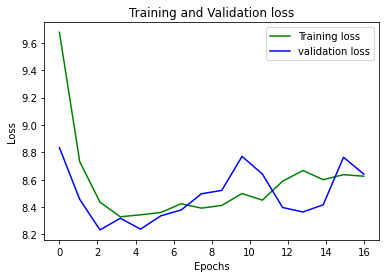

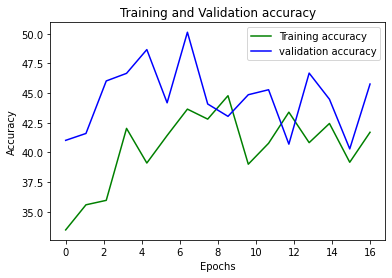

In [18]:
net = Net()
trainloss = []
valloss = []
trainacc = []
valacc = []

print("batch_size: ", batch, " learning_rate: ", lr)
nntrain(trainloss, valloss, trainacc, valacc, lr, 16)
plotting(trainloss, valloss, 16, True)
plotting(trainacc, valacc, 16, False)

High learning rate leads to a fluctuation in the plots. 

2. learning rate is 0.001

batch_size:  4  learning_rate:  0.001

epoch:  1
[1, 11250] training loss: 9.492
Accuracy of the network on the 45000 train set images: 42 %
[1,  1250] validation loss: 7.788
Accuracy of the network on the 5000 validation set images: 46 %

epoch:  2
[2, 11250] training loss: 7.460
Accuracy of the network on the 45000 train set images: 49 %
[2,  1250] validation loss: 6.968
Accuracy of the network on the 5000 validation set images: 54 %

epoch:  3
[3, 11250] training loss: 6.804
Accuracy of the network on the 45000 train set images: 54 %
[3,  1250] validation loss: 6.406
Accuracy of the network on the 5000 validation set images: 59 %

epoch:  4
[4, 11250] training loss: 6.347
Accuracy of the network on the 45000 train set images: 56 %
[4,  1250] validation loss: 6.073
Accuracy of the network on the 5000 validation set images: 61 %

epoch:  5
[5, 11250] training loss: 6.014
Accuracy of the network on the 45000 train set images: 59 %
[5,  1250] validation loss: 5.720
Accuracy of the netwo

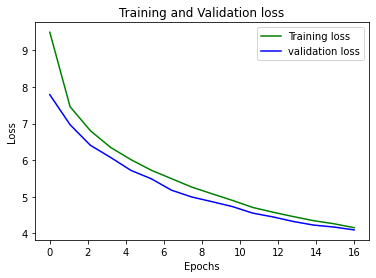

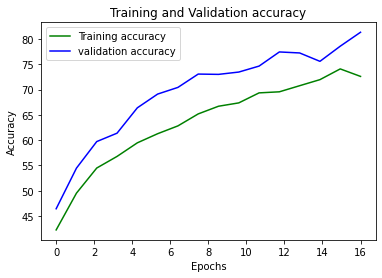

In [19]:
lr = 0.001
net = Net()
trainloss = []
valloss = []
trainacc = []
valacc = []

print("batch_size: ", batch, " learning_rate: ", lr)
nntrain(trainloss, valloss, trainacc, valacc, lr, 16)
plotting(trainloss, valloss, 16, True)
plotting(trainacc, valacc, 16, False)

Althought a very high accuracy, the margin between the validation and training dataset accuracy is too large to be considered a good choice

3. learning rate is 0.0005

batch_size:  4  learning_rate:  0.0005

epoch:  1
[1, 11250] training loss: 10.493
Accuracy of the network on the 45000 train set images: 33 %
[1,  1250] validation loss: 8.938
Accuracy of the network on the 5000 validation set images: 38 %

epoch:  2
[2, 11250] training loss: 8.076
Accuracy of the network on the 45000 train set images: 46 %
[2,  1250] validation loss: 7.385
Accuracy of the network on the 5000 validation set images: 49 %

epoch:  3
[3, 11250] training loss: 7.164
Accuracy of the network on the 45000 train set images: 50 %
[3,  1250] validation loss: 6.709
Accuracy of the network on the 5000 validation set images: 54 %

epoch:  4
[4, 11250] training loss: 6.561
Accuracy of the network on the 45000 train set images: 54 %
[4,  1250] validation loss: 6.210
Accuracy of the network on the 5000 validation set images: 59 %

epoch:  5
[5, 11250] training loss: 6.096
Accuracy of the network on the 45000 train set images: 60 %
[5,  1250] validation loss: 5.779
Accuracy of the net

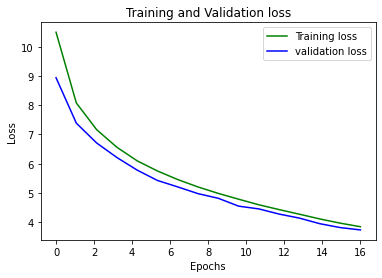

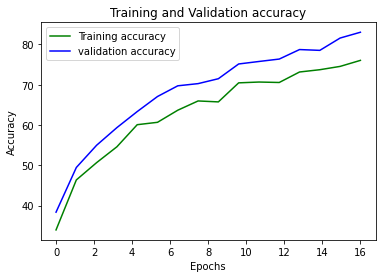

In [20]:
lr = 0.0005
net = Net()
trainloss = []
valloss = []
trainacc = []
valacc = []

print("batch_size: ", batch, " learning_rate: ", lr)
nntrain(trainloss, valloss, trainacc, valacc, lr, 16)
plotting(trainloss, valloss, 16, True)
plotting(trainacc, valacc, 16, False)

Althought a very high accuracy, the margin between the validation and training dataset accuracy is big. However, this trend is seems to be much better than any other variables perviously.

4. learning rate is 0.0001

batch_size:  4  learning_rate:  0.0001

epoch:  1
[1, 11250] training loss: 11.513
Accuracy of the network on the 45000 train set images: 11 %
[1,  1250] validation loss: 11.495
Accuracy of the network on the 5000 validation set images: 12 %

epoch:  2
[2, 11250] training loss: 11.265
Accuracy of the network on the 45000 train set images: 20 %
[2,  1250] validation loss: 10.741
Accuracy of the network on the 5000 validation set images: 21 %

epoch:  3
[3, 11250] training loss: 9.903
Accuracy of the network on the 45000 train set images: 32 %
[3,  1250] validation loss: 9.271
Accuracy of the network on the 5000 validation set images: 33 %

epoch:  4
[4, 11250] training loss: 8.836
Accuracy of the network on the 45000 train set images: 37 %
[4,  1250] validation loss: 8.346
Accuracy of the network on the 5000 validation set images: 41 %

epoch:  5
[5, 11250] training loss: 8.162
Accuracy of the network on the 45000 train set images: 41 %
[5,  1250] validation loss: 7.782
Accuracy of the 

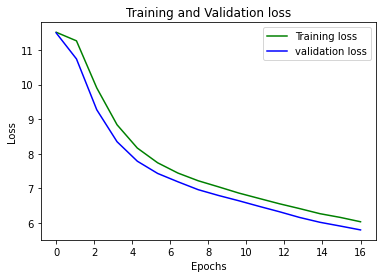

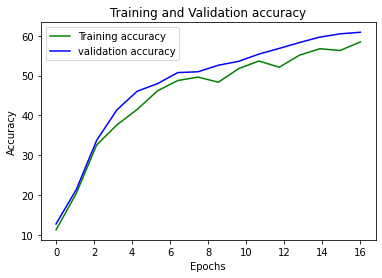

In [21]:
lr = 0.0001
net = Net()
trainloss = []
valloss = []
trainacc = []
valacc = []

print("batch_size: ", batch, " learning_rate: ", lr)
nntrain(trainloss, valloss, trainacc, valacc, lr, 16)
plotting(trainloss, valloss, 16, True)
plotting(trainacc, valacc, 16, False)

Low accuracy to start with, hence low accuracy after training. 

5. learning rate is 0.00005

batch_size:  4  learning_rate:  5e-05

epoch:  1
[1, 11250] training loss: 11.512
Accuracy of the network on the 45000 train set images: 10 %
[1,  1250] validation loss: 11.499
Accuracy of the network on the 5000 validation set images: 14 %

epoch:  2
[2, 11250] training loss: 11.473
Accuracy of the network on the 45000 train set images: 14 %
[2,  1250] validation loss: 11.417
Accuracy of the network on the 5000 validation set images: 15 %

epoch:  3
[3, 11250] training loss: 10.888
Accuracy of the network on the 45000 train set images: 24 %
[3,  1250] validation loss: 10.175
Accuracy of the network on the 5000 validation set images: 25 %

epoch:  4
[4, 11250] training loss: 10.004
Accuracy of the network on the 45000 train set images: 27 %
[4,  1250] validation loss: 9.785
Accuracy of the network on the 5000 validation set images: 29 %

epoch:  5
[5, 11250] training loss: 9.548
Accuracy of the network on the 45000 train set images: 32 %
[5,  1250] validation loss: 9.143
Accuracy of th

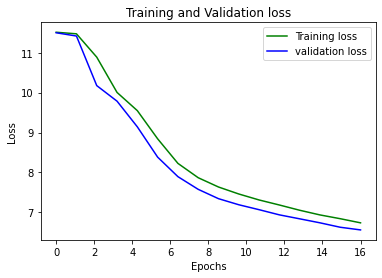

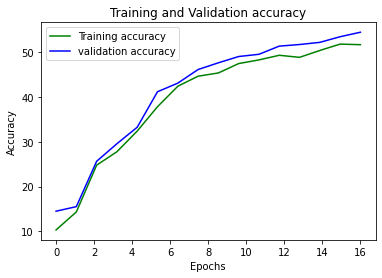

In [22]:
lr = 0.00005
net = Net()
trainloss = []
valloss = []
trainacc = []
valacc = []

print("batch_size: ", batch, " learning_rate: ", lr)
nntrain(trainloss, valloss, trainacc, valacc, lr, 16)
plotting(trainloss, valloss, 16, True)
plotting(trainacc, valacc, 16, False)

Low accuracy to start with, hence low accuracy after training. 

6. learning rate is 0.00001

batch_size:  4  learning_rate:  1e-05

epoch:  1
[1, 11250] training loss: 11.520
Accuracy of the network on the 45000 train set images: 10 %
[1,  1250] validation loss: 11.523
Accuracy of the network on the 5000 validation set images: 9 %

epoch:  2
[2, 11250] training loss: 11.517
Accuracy of the network on the 45000 train set images: 10 %
[2,  1250] validation loss: 11.519
Accuracy of the network on the 5000 validation set images: 9 %

epoch:  3
[3, 11250] training loss: 11.514
Accuracy of the network on the 45000 train set images: 10 %
[3,  1250] validation loss: 11.516
Accuracy of the network on the 5000 validation set images: 9 %

epoch:  4
[4, 11250] training loss: 11.512
Accuracy of the network on the 45000 train set images: 10 %
[4,  1250] validation loss: 11.514
Accuracy of the network on the 5000 validation set images: 9 %

epoch:  5
[5, 11250] training loss: 11.510
Accuracy of the network on the 45000 train set images: 10 %
[5,  1250] validation loss: 11.511
Accuracy of the

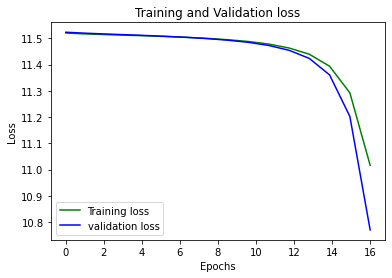

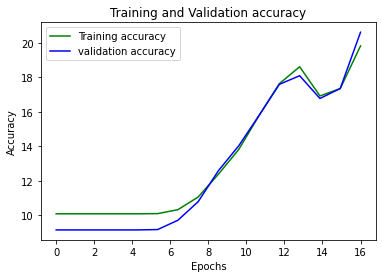

In [23]:
lr = 0.00001
net = Net()
trainloss = []
valloss = []
trainacc = []
valacc = []

print("batch_size: ", batch, " learning_rate: ", lr)
nntrain(trainloss, valloss, trainacc, valacc, lr, 16)
plotting(trainloss, valloss, 16, True)
plotting(trainacc, valacc, 16, False)

The plots are too bad to be considered a choice. 

When batch size is 8:
1. learning rate is 0.005

In [9]:
batch = 8
lr = 0.005

In [10]:
NEWtrainloader = torch.utils.data.DataLoader(NEWtrainset, batch_size=batch,
                                          shuffle=True, num_workers=2)
validationloader = torch.utils.data.DataLoader(validationset, batch_size=batch,
                                          shuffle=True, num_workers=2)

batch_size:  8  learning_rate:  0.005

epoch:  1
[1,  5625] training loss: 9.195
Accuracy of the network on the 45000 train set images: 44 %
[1,   625] validation loss: 7.808
Accuracy of the network on the 5000 validation set images: 45 %

epoch:  2
[2,  5625] training loss: 7.626
Accuracy of the network on the 45000 train set images: 47 %
[2,   625] validation loss: 7.217
Accuracy of the network on the 5000 validation set images: 54 %

epoch:  3
[3,  5625] training loss: 7.182
Accuracy of the network on the 45000 train set images: 52 %
[3,   625] validation loss: 6.858
Accuracy of the network on the 5000 validation set images: 55 %

epoch:  4
[4,  5625] training loss: 6.878
Accuracy of the network on the 45000 train set images: 53 %
[4,   625] validation loss: 6.707
Accuracy of the network on the 5000 validation set images: 59 %

epoch:  5
[5,  5625] training loss: 6.642
Accuracy of the network on the 45000 train set images: 55 %
[5,   625] validation loss: 6.438
Accuracy of the netwo

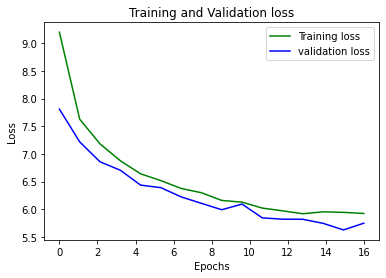

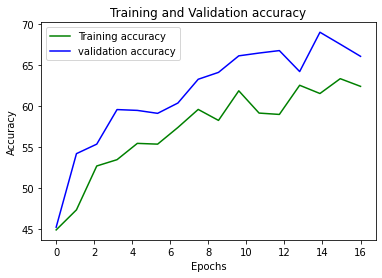

In [26]:
net = Net()
trainloss = []
valloss = []
trainacc = []
valacc = []

print("batch_size: ", batch, " learning_rate: ", lr)
nntrain(trainloss, valloss, trainacc, valacc, lr, 16)
plotting(trainloss, valloss, 16, True)
plotting(trainacc, valacc, 16, False)

The margin between the validation and training accuracy is too large.

2. learning rate is 0.001

batch_size:  8  learning_rate:  0.001

epoch:  1
[1,  5625] training loss: 10.849
Accuracy of the network on the 45000 train set images: 31 %
[1,   625] validation loss: 9.231
Accuracy of the network on the 5000 validation set images: 35 %

epoch:  2
[2,  5625] training loss: 8.083
Accuracy of the network on the 45000 train set images: 47 %
[2,   625] validation loss: 7.386
Accuracy of the network on the 5000 validation set images: 49 %

epoch:  3
[3,  5625] training loss: 7.040
Accuracy of the network on the 45000 train set images: 53 %
[3,   625] validation loss: 6.735
Accuracy of the network on the 5000 validation set images: 53 %

epoch:  4
[4,  5625] training loss: 6.470
Accuracy of the network on the 45000 train set images: 56 %
[4,   625] validation loss: 6.275
Accuracy of the network on the 5000 validation set images: 60 %

epoch:  5
[5,  5625] training loss: 6.035
Accuracy of the network on the 45000 train set images: 59 %
[5,   625] validation loss: 5.898
Accuracy of the netw

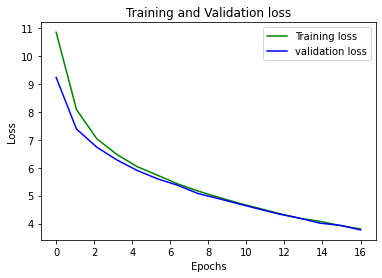

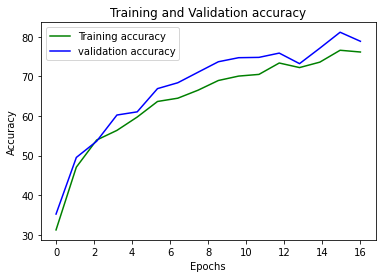

In [14]:
lr = 0.001
net = Net()
trainloss = []
valloss = []
trainacc = []
valacc = []

print("batch_size: ", batch, " learning_rate: ", lr)
nntrain(trainloss, valloss, trainacc, valacc, lr, 16)
plotting(trainloss, valloss, 16, True)
plotting(trainacc, valacc, 16, False)

Best performance so far. 

3. learning rate is 0.0005

batch_size:  8  learning_rate:  0.0005

epoch:  1
[1,  5625] training loss: 11.502
Accuracy of the network on the 45000 train set images: 12 %
[1,   625] validation loss: 11.370
Accuracy of the network on the 5000 validation set images: 14 %

epoch:  2
[2,  5625] training loss: 10.121
Accuracy of the network on the 45000 train set images: 31 %
[2,   625] validation loss: 9.435
Accuracy of the network on the 5000 validation set images: 33 %

epoch:  3
[3,  5625] training loss: 8.845
Accuracy of the network on the 45000 train set images: 39 %
[3,   625] validation loss: 8.154
Accuracy of the network on the 5000 validation set images: 43 %

epoch:  4
[4,  5625] training loss: 7.763
Accuracy of the network on the 45000 train set images: 46 %
[4,   625] validation loss: 7.324
Accuracy of the network on the 5000 validation set images: 48 %

epoch:  5
[5,  5625] training loss: 7.214
Accuracy of the network on the 45000 train set images: 50 %
[5,   625] validation loss: 6.887
Accuracy of the n

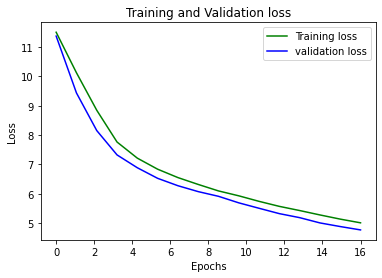

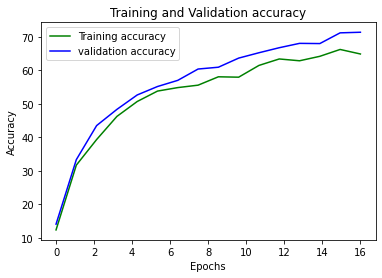

In [28]:
lr = 0.0005
net = Net()
trainloss = []
valloss = []
trainacc = []
valacc = []

print("batch_size: ", batch, " learning_rate: ", lr)
nntrain(trainloss, valloss, trainacc, valacc, lr, 16)
plotting(trainloss, valloss, 16, True)
plotting(trainacc, valacc, 16, False)

Good performace as well.

4. learning rate is 0.0001

batch_size:  8  learning_rate:  0.0001

epoch:  1
[1,  5625] training loss: 11.523
Accuracy of the network on the 45000 train set images: 10 %
[1,   625] validation loss: 11.515
Accuracy of the network on the 5000 validation set images: 10 %

epoch:  2
[2,  5625] training loss: 11.512
Accuracy of the network on the 45000 train set images: 10 %
[2,   625] validation loss: 11.509
Accuracy of the network on the 5000 validation set images: 11 %

epoch:  3
[3,  5625] training loss: 11.505
Accuracy of the network on the 45000 train set images: 16 %
[3,   625] validation loss: 11.497
Accuracy of the network on the 5000 validation set images: 17 %

epoch:  4
[4,  5625] training loss: 11.467
Accuracy of the network on the 45000 train set images: 16 %
[4,   625] validation loss: 11.377
Accuracy of the network on the 5000 validation set images: 16 %

epoch:  5
[5,  5625] training loss: 10.881
Accuracy of the network on the 45000 train set images: 24 %
[5,   625] validation loss: 10.266
Accuracy o

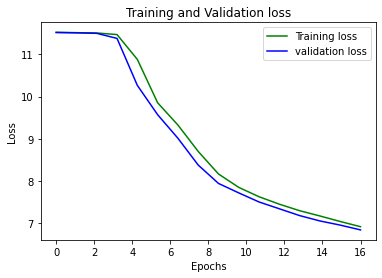

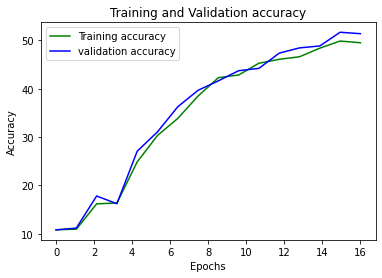

In [11]:
lr = 0.0001
net = Net()
trainloss = []
valloss = []
trainacc = []
valacc = []

print("batch_size: ", batch, " learning_rate: ", lr)
nntrain(trainloss, valloss, trainacc, valacc, lr, 16)
plotting(trainloss, valloss, 16, True)
plotting(trainacc, valacc, 16, False)

Low accuracy. 

5. learning rate is 0.00005

batch_size:  8  learning_rate:  5e-05

epoch:  1
[1,  5625] training loss: 11.519
Accuracy of the network on the 45000 train set images: 10 %
[1,   625] validation loss: 11.516
Accuracy of the network on the 5000 validation set images: 10 %

epoch:  2
[2,  5625] training loss: 11.513
Accuracy of the network on the 45000 train set images: 10 %
[2,   625] validation loss: 11.511
Accuracy of the network on the 5000 validation set images: 10 %

epoch:  3
[3,  5625] training loss: 11.508
Accuracy of the network on the 45000 train set images: 10 %
[3,   625] validation loss: 11.507
Accuracy of the network on the 5000 validation set images: 9 %

epoch:  4
[4,  5625] training loss: 11.503
Accuracy of the network on the 45000 train set images: 10 %
[4,   625] validation loss: 11.498
Accuracy of the network on the 5000 validation set images: 10 %

epoch:  5
[5,  5625] training loss: 11.492
Accuracy of the network on the 45000 train set images: 10 %
[5,   625] validation loss: 11.482
Accuracy of 

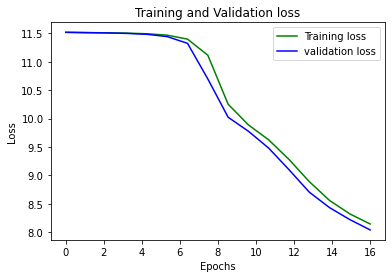

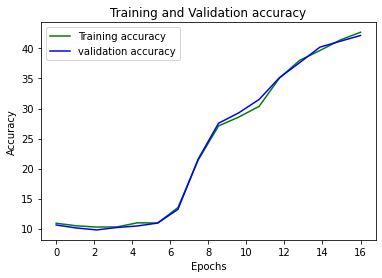

In [12]:
lr = 0.00005
net = Net()
trainloss = []
valloss = []
trainacc = []
valacc = []

print("batch_size: ", batch, " learning_rate: ", lr)
nntrain(trainloss, valloss, trainacc, valacc, lr, 16)
plotting(trainloss, valloss, 16, True)
plotting(trainacc, valacc, 16, False)

Low accuracy. 

6. learning rate is 0.00001

batch_size:  8  learning_rate:  1e-05

epoch:  1
[1,  5625] training loss: 11.522
Accuracy of the network on the 45000 train set images: 10 %
[1,   625] validation loss: 11.521
Accuracy of the network on the 5000 validation set images: 9 %

epoch:  2
[2,  5625] training loss: 11.520
Accuracy of the network on the 45000 train set images: 10 %
[2,   625] validation loss: 11.519
Accuracy of the network on the 5000 validation set images: 9 %

epoch:  3
[3,  5625] training loss: 11.518
Accuracy of the network on the 45000 train set images: 10 %
[3,   625] validation loss: 11.517
Accuracy of the network on the 5000 validation set images: 9 %

epoch:  4
[4,  5625] training loss: 11.516
Accuracy of the network on the 45000 train set images: 10 %
[4,   625] validation loss: 11.515
Accuracy of the network on the 5000 validation set images: 9 %

epoch:  5
[5,  5625] training loss: 11.514
Accuracy of the network on the 45000 train set images: 10 %
[5,   625] validation loss: 11.513
Accuracy of the

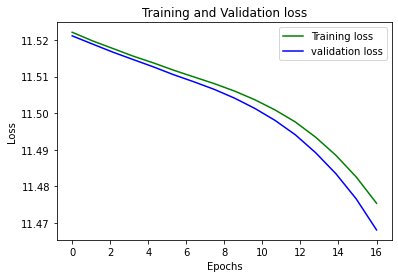

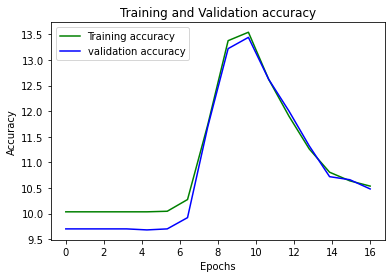

In [13]:
lr = 0.00001
net = Net()
trainloss = []
valloss = []
trainacc = []
valacc = []

print("batch_size: ", batch, " learning_rate: ", lr)
nntrain(trainloss, valloss, trainacc, valacc, lr, 16)
plotting(trainloss, valloss, 16, True)
plotting(trainacc, valacc, 16, False)

Low accuracy. 

##### your analysis comes here:
-----
1) One epoch at batch size 2 with learning rate of 0.005 is about 3.8 minutes, including the calculation of the training and validation loss, as well as the accuracies of both data set. However, I have also noticed that as the batch size increases, the time it takes for one epoch decreases, this is might be due to the fact that there are less data in the data loader that needs to be trained each epoch since I spilt the sample into 8 packets instead of 4 or 2. 

2) Before the experiments, the choices of the hyperparameters that can be ignored are batch size 2, learning rate 0.005, 0.00005 and 0.00001, and epoch 2 and 4. Epoch 2 and 4 seems to be too small to train the CIFAR10 data set, it is very likely that underfitting problem will occur because there should still have a lot of room for improvement after 4 epoches. Batch size 2 is also bad for training in this case, because it would be too noisy for the model to convergence anywhere.
After conducting the experiment, I can see that with batch size 2, some loss and accuracy cruve cannot be converged even after 16 epoches, some are flunctuating at low accuracy rate and high loss. I am also right about the epoch, after epoch 2 and 4, many of the training still have a significant amount of improvement in accuracy and decreasing in loss.

3) Network seems to have a different epoch choice to converge. The network with the hyperparamters that I have picked, converged after about 14 epoches. 

4) A learning rate that is too small may never converge or may get stuck on a suboptimal solution. However, if the learning rate is too large, the training will skip the optimal solution and decrase in accuracy and increase loss again in future epoch, beacause it overlearn. One finding during the analysis is that a low learning rate will have a very low accuracy at the first few epochs and hence the final accuracy is low. The high learning will have a good accuracy at the end but the margin between the validation and training dataset is large.

5) I am using standard colab to run the program. Therefore the cpu I am using should be Intel(R) Xeon(R) CPU @ 2.20GHz. The RAM size is 12.68GB and the Disk size is 107.72GB.

6) There are overfitting problems. For example, the one with batch size 8, learning rate 0.0005. The margin of the training and validation loss gets larger after 8 epoches. 

7) The choice of the hyperparameters that I have chosen have an accuracy of 81% at epoch 15. It has the best accuracy of all the network, also the loss and accuracy of both training and validation are very close to each other. 

8) One additional finding is that the network performs differently every time. So to analysis the hyperparameters, one can rerun the network a few times to determine the best choice.

### Part 3: More options

Please indicate the **three** tasks you are assigned here:

1) Transformation: Resize + Flip

2) Structure: Pooling Method

3) Training procedure: lr scheduler: MultiStep

For your new baseline and the test for different options, you need to write them in **ONE** single `.py` file. You can debug here, but do **NOT** include your codes in the submitted ipynb file. Your codes for this part will be put in the **project1.py** file.

**Question**: how do you define your new baseline and why? Please highlight the differences between your new baseline and the previous baseline.

##### your analysis comes here:
-----
1) The new baseline contains 3 conv + 3 pooling + 3 fc. Comparing to the old baseline in previous part, there is an additional layer of conv + pool. This layer will further reduce the number of feature maps. I have changed the batch size to 8, beacause I think it generate slightly better result than batch size 4 in previous analysis. 
   
2) The other difference is the parameters of the convolution layers. I have also reduced the kernel size of all the conv layers from 5 to 2, because in the analysis below a resize method will be conducted and a high kernel size might result in an image size being too small for further training.

_____

**Question**: how did you test the three tasks and what did you learn? Please use some figures, math equations and output from your codes to make analysis. 

##### your analysis comes here:
-----
1) Flip and Resize: For resizing, I have used both image size 20 and 40. Flip includes horizontal flip and vertical flip, so there are total of 4 possible networks. I have tested them one by one. As we can see from the figures below, when the size of the image is shrunk to 20, the accuracy is significantly less than the networks with image size 40. Furtheremore, in contrast horizontal flips have a higher accuracy than the vertical flips. Hence the method I am going to choose the method with the highest accuracy, which is resize the image to 40*40, with a random horizontal flip. Unfortunately, the four possible network cannot fully guarantee a high accuracy goal here. 
   
20 * 20 Horizontal Flip      |  20 * 20 Veritcal Flip
:-------------------------:|:-------------------------:
![](size20*20_horizontal.png)| ![](size20*20_vertical.png)

40 * 40 Horizontal Flip      |  40 * 40 Veritcal Flip
:-------------------------:|:-------------------------:
![](size40*40_horizontal.png)| ![](size40*40_vertical.png)

**Interestingly**, resizing images is a critical pre-processing step in deep learning. Principally, deep learning models train faster on small images. But the drawback might be the low accuracy overall accroding to my findings. A larger input image increases the training time for the network as expected. The most important aspect on resizing is to find a suitable size for the image that is not too large and the feature can be preserved as perfect as possible.[1] At this moment, I think I have not found the very promising solution. I can see a lot of deep learning models online tends to resize the image from 32 * 32 to 227 * 227, but unfortunately the time consumption and hareware capacity do not allow me to implement this. 

2) Pooling Method: I have chosen kernel size 2 and 3 for the network. There are both averge and maximum pooling available. In AvgPool, the average presence of features is highlighted while in MaxPool, specific features are highlighted irrespective of location.[2] Since there are maxpool and avgpool for pooling method, so total of 4 possible networks. I have tested them one by one. During testing, I have also resize the image to 40*40 so that a kernel size 3 is still feasible. It seems that the accuracy of kernel size 3 is less than that of 2 and the maximum pooling with kernel size 2 has a slightly better performance than that of averge pooling, therefore I will adapt it to my modified network. 

maxpooling 2     |  maxpooling 3
:-------------------------:|:-------------------------:
![](pooling%20size%202.png)| ![](pooling%20size%203.png)

avgpooling 2     |  avgpooling 3
:-------------------------:|:-------------------------:
![](avgpooling%20size%202.png)|![](avgpooling%20size%203.png)

**The pooling layer** is an important layer that executes the down-sampling on the feature maps coming from the previous layer and produces new feature maps with a condensed resolution. This layer drastically reduces the spatial dimension of input. It firstly can reduce the number of parameters or weights, thus decrease the loss on training. The second is to control the overfitting of the network. An ideal pooling method is expected to extract only useful information and discard irrelevant details.[3]

3) MultiStep lr scheduler: I have chosen milestone size 4, 8 for the network. That is, the epoch size before the learning rate decay by 0.1. Since they have the very similar characterstic on both loss and accuracy, I am going to choice milestone 8 with 0.001 learning rate for my modified network, because it has a more smooth tends in the accuracy. 
   
lr=0.001_milestone 4  |  lr=0.001_milestone 8
:-------------------------:|:-------------------------:
![](milestone%204.png)|![](milestone%208.png)

lr=0.01_milestone 4  |  lr=0.01_milestone 8
:-------------------------:|:-------------------------:
![](lr0.01_milestone%204.png)|![](lr0.01_milestone%208.png)

A Learning rate schedule is a predefined framework that adjusts the learning rate between epochs or iterations as the training progresses. Learning rate decay: we select an initial learning rate, then gradually reduce it in accordance with a scheduler. Usually, in a neural network, the model weight is updated as $w^+ = w - \eta * \frac {\partial Etotal}{\partial w}$, $\eta$ is the learning rate. For the training process, this is good. Early in the training, the learning rate is set to be large in order to reach a set of weights that are good enough. Over time, these weights are fine-tuned to reach higher accuracy by leveraging a small learning rate.[4]

_____

### Reference
1. Sergio Saponara; Abdussalam Elhanashi, **Impact of Image Resizing on Deep Learning Detectors for Training Time and Model Performance**, *https://link.springer.com/chapter/10.1007/978-3-030-95498-7_2*
2. Priyanshi Sharma, **MaxPool vs AvgPool**, *https://iq.opengenus.org/maxpool-vs-avgpool/*
3. Hossein Khosravi, **Pooling Methods in Deep Neural Networks, a Review**, *https://arxiv.org/abs/2009.07485*
4. Author Katherine(Yi) Li, **How to Choose a Learning Rate Scheduler for Neural Networks**, *https://neptune.ai/blog/how-to-choose-a-learning-rate-scheduler*

### Specs:
CPU:        Intel(R) Xeon(R) CPU @ 2.20GHz

RAM:        12.68GB

Disk:       107.72GB

Software:   1.12.1+cu113(colab version) 